In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
import paths
from preprocessing import read_csv_clean
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block

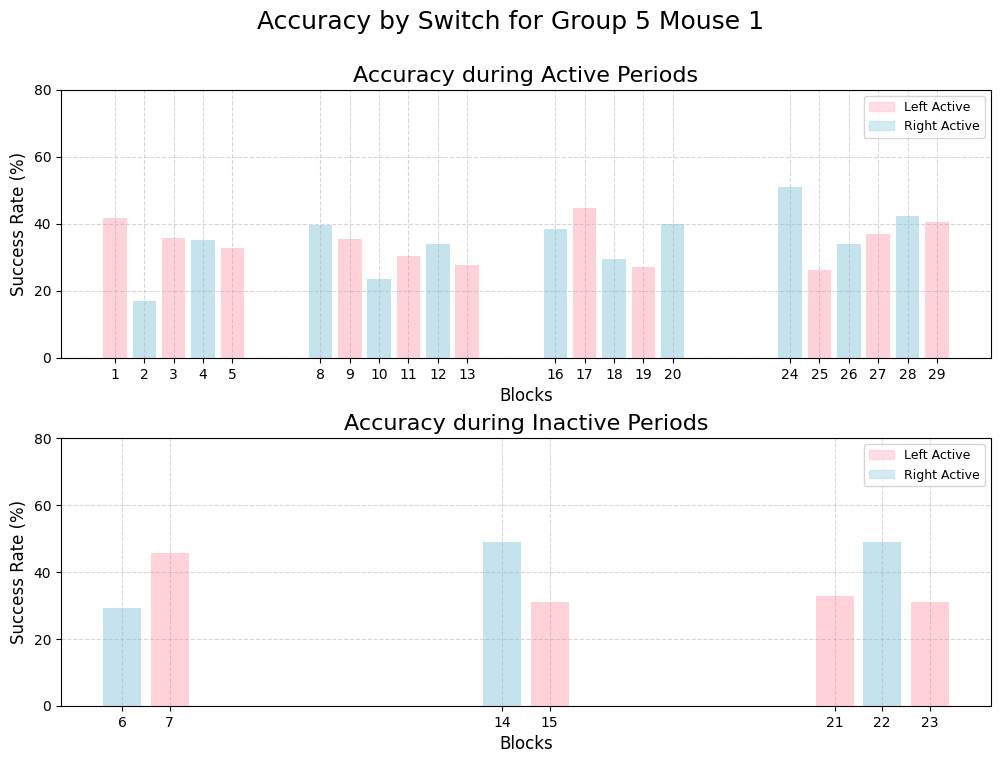

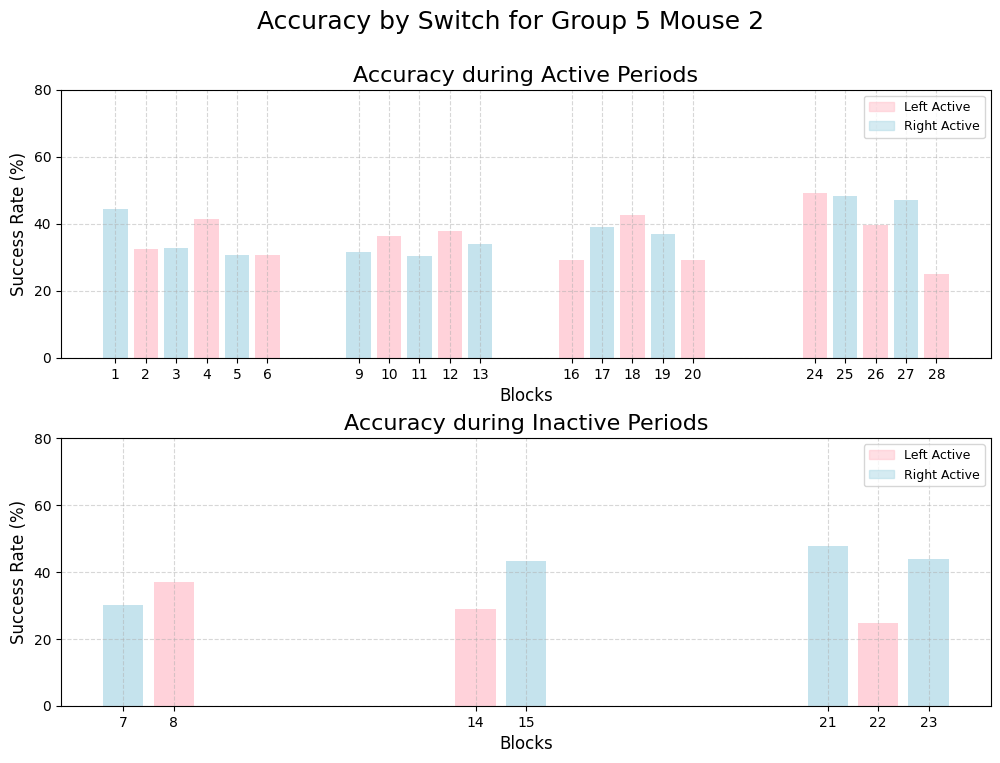

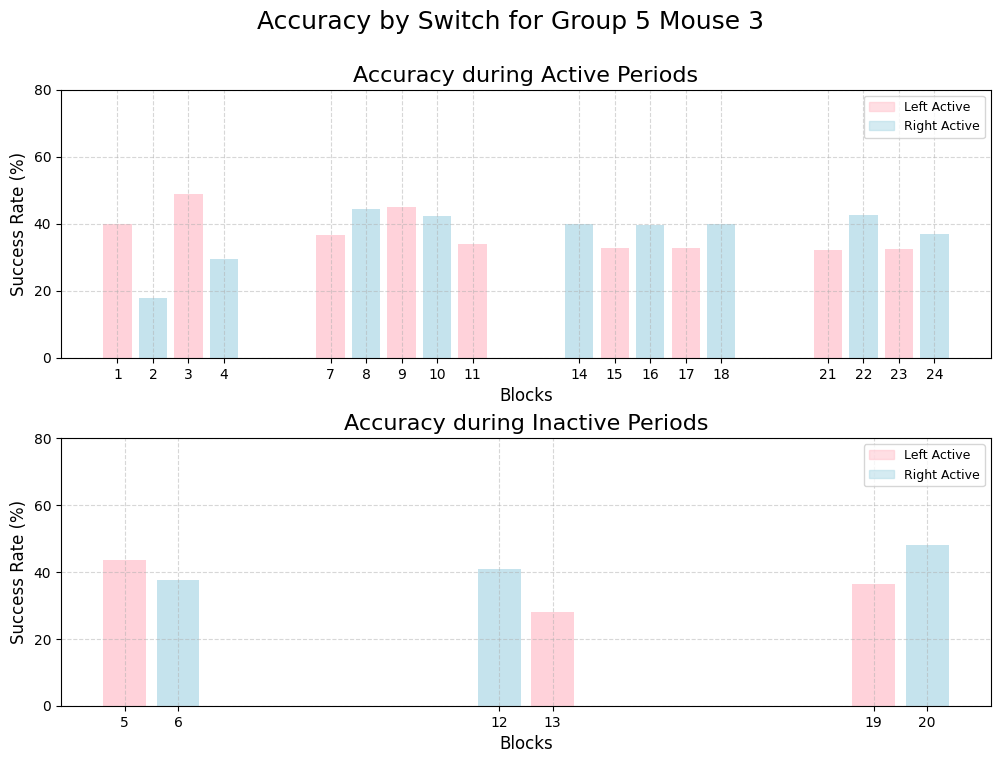

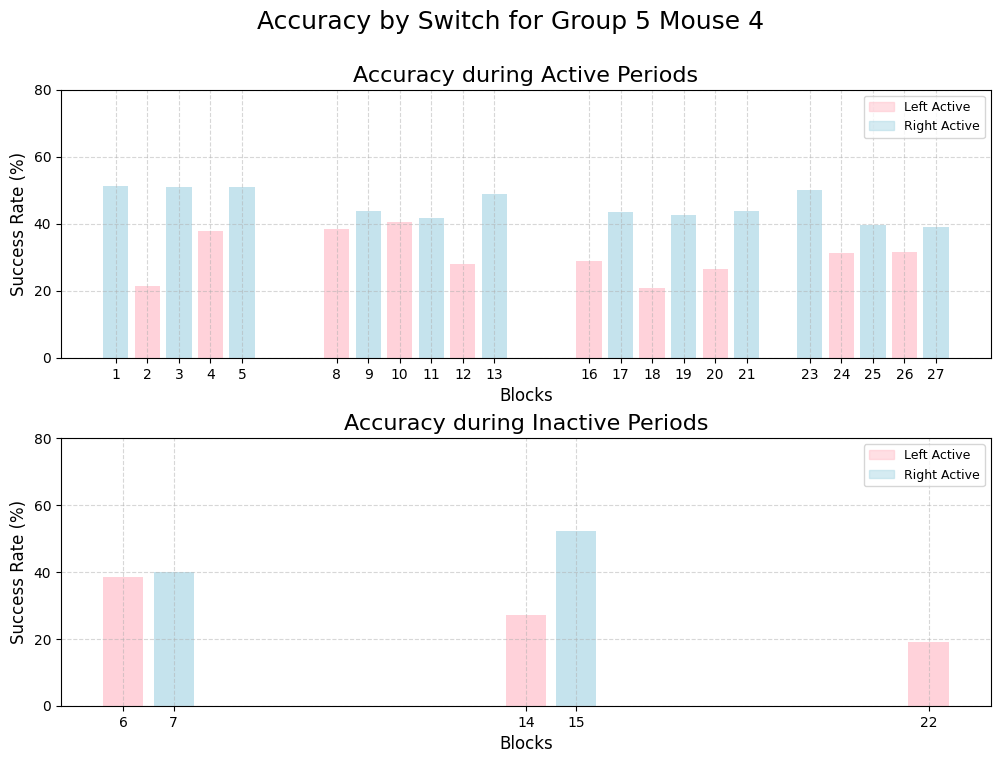

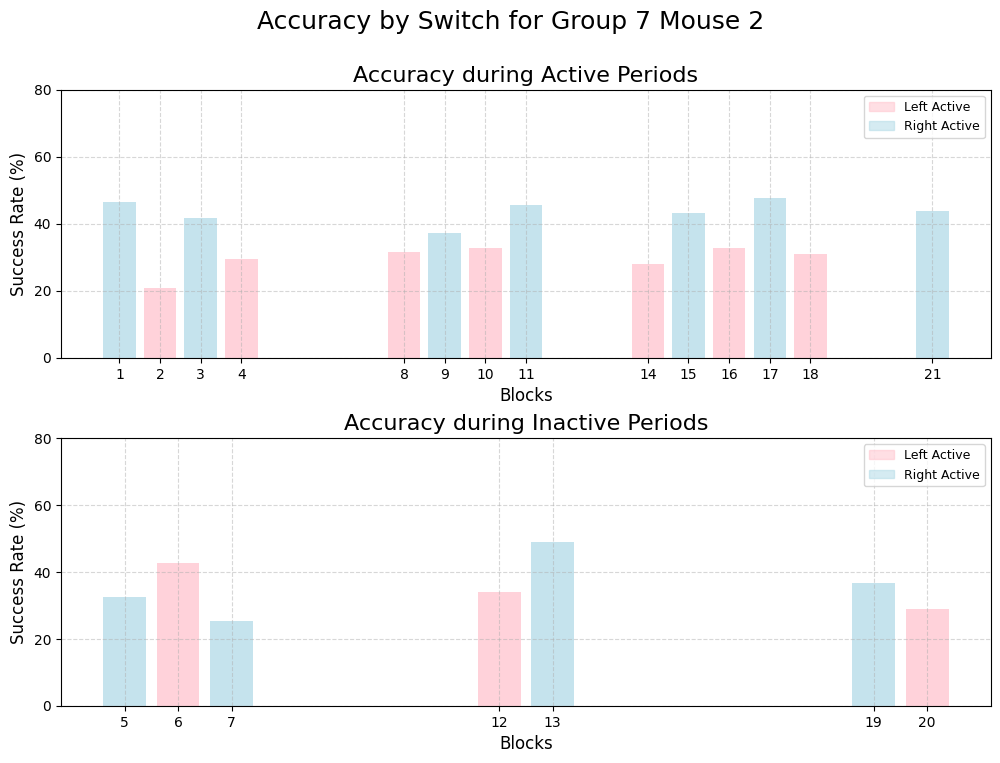

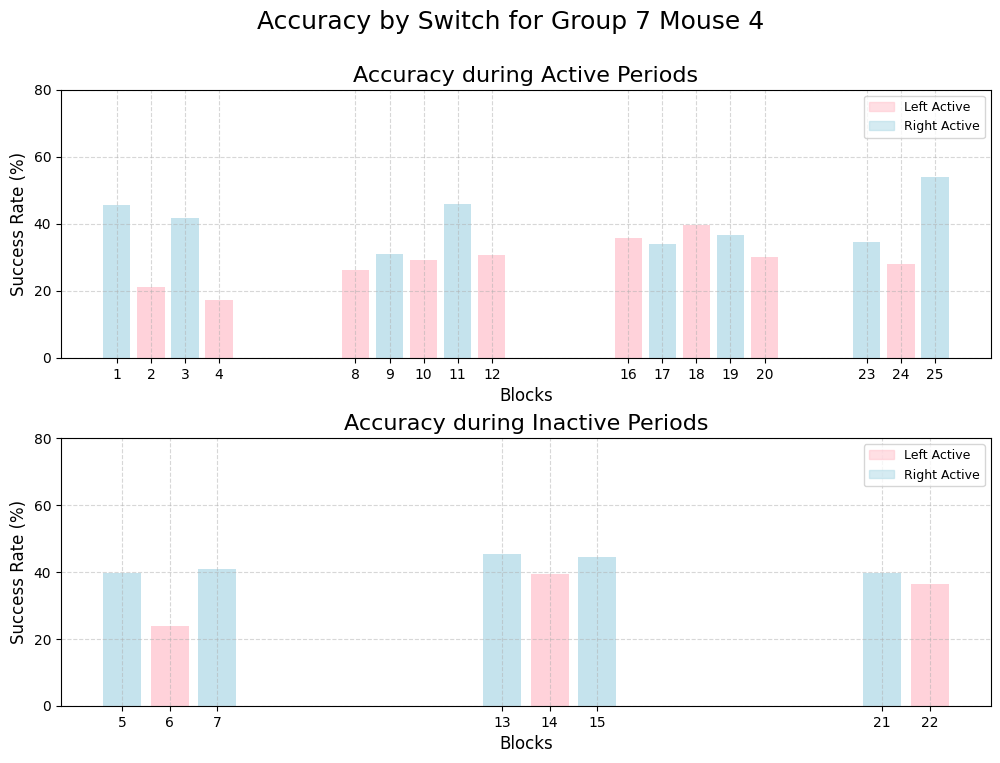

../scripts/preprocessing.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


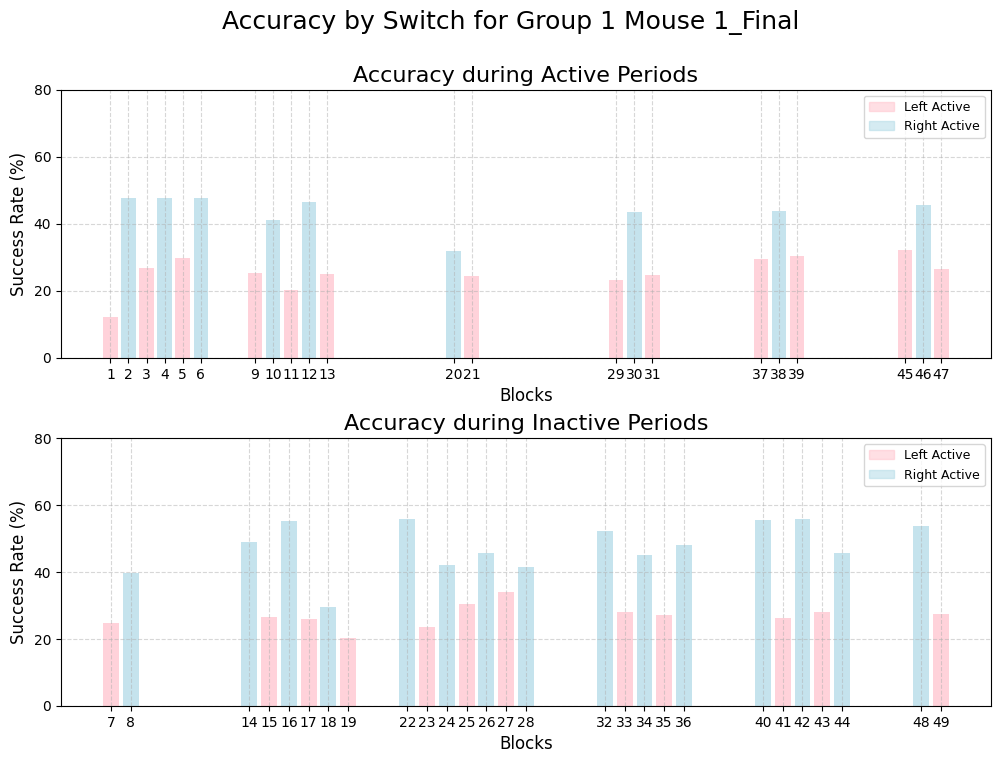

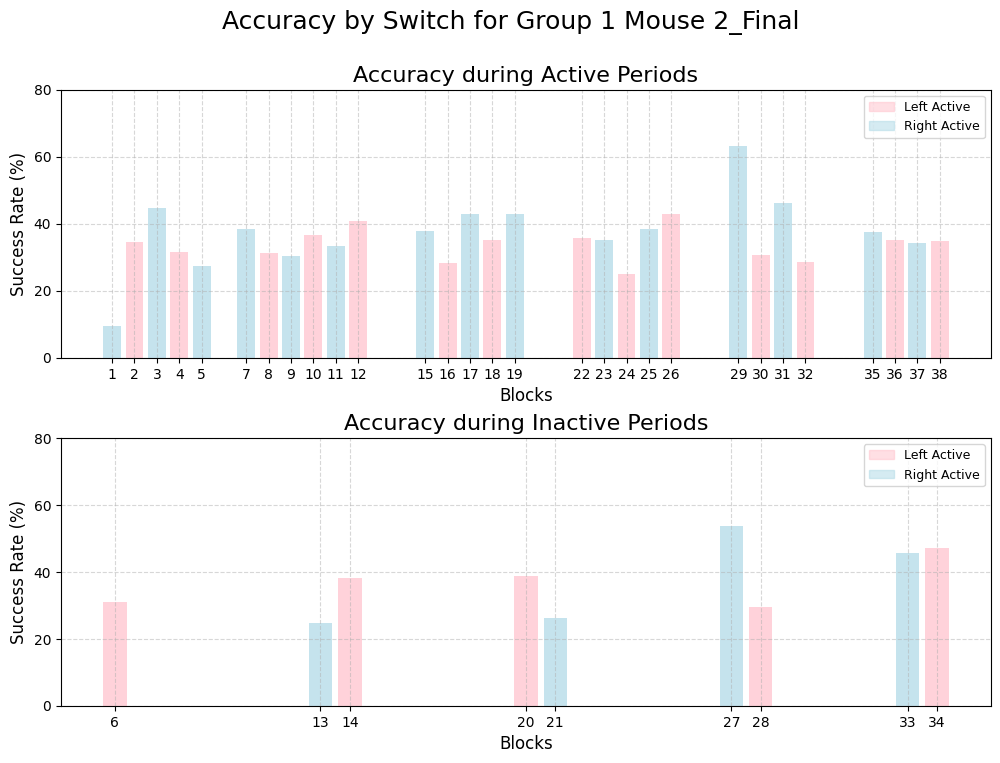

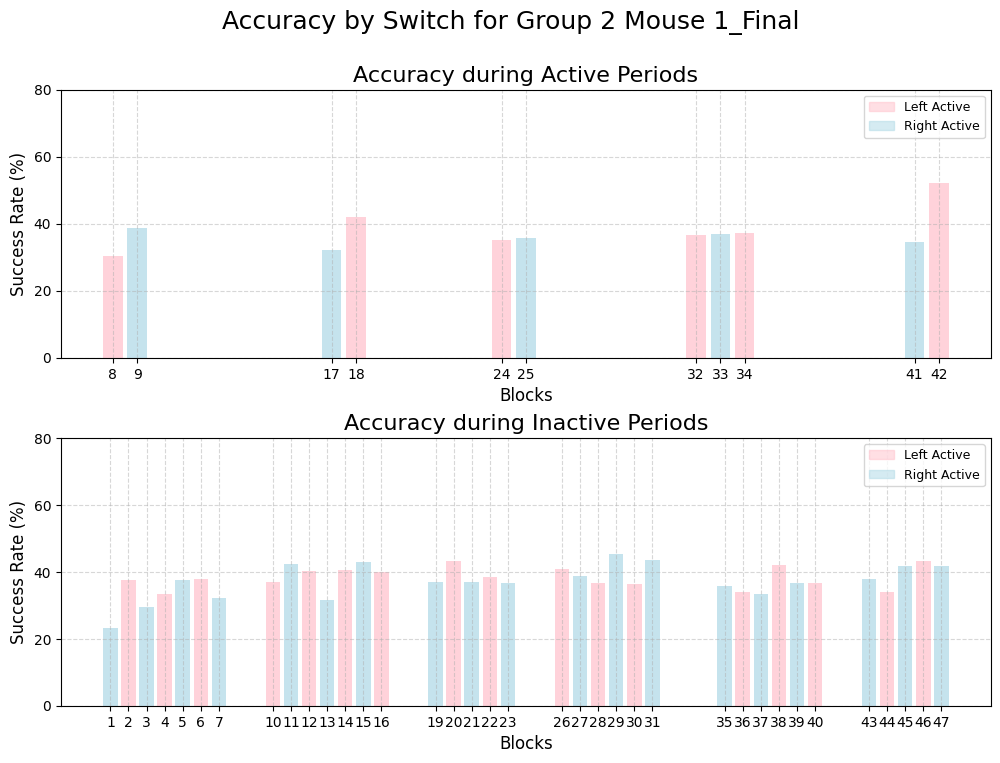

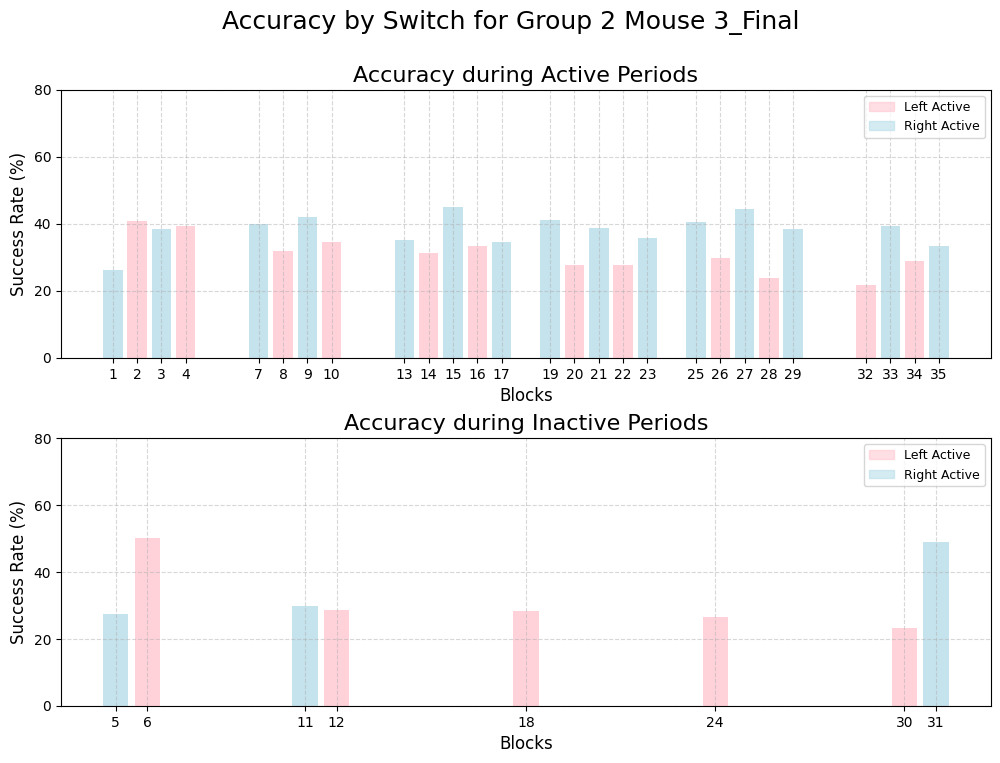

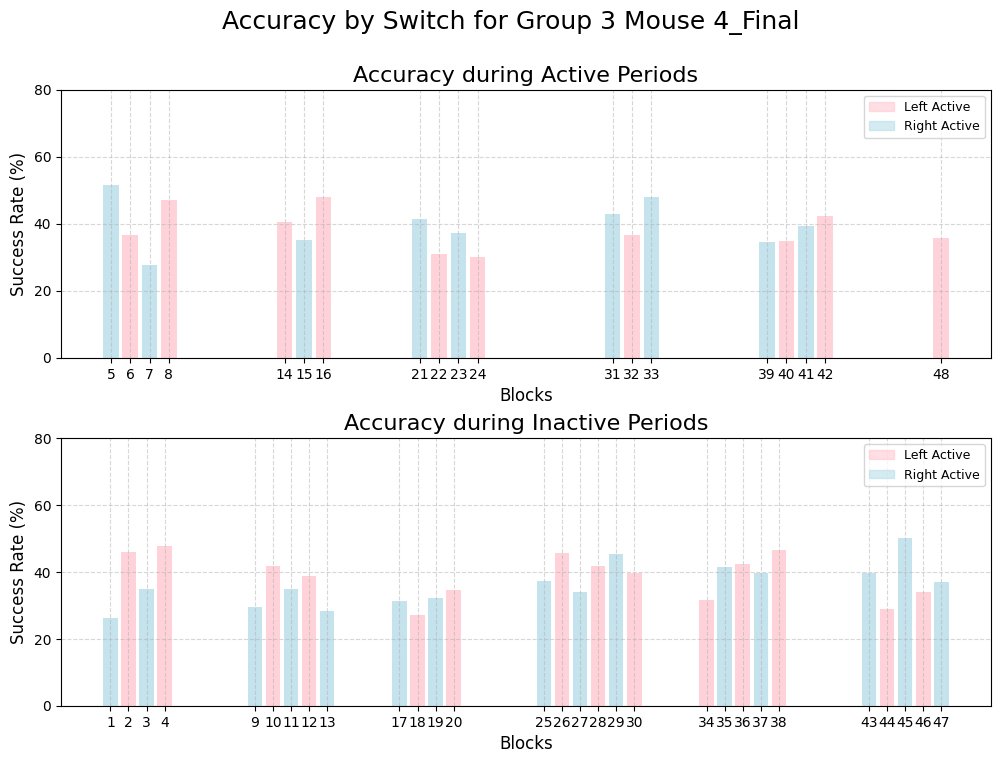

In [2]:
action_prop = 0.8
block_prop = 0.6
meal_config=[60, 2]

ctrl_scores = []

for path in paths.contigency_flip_ctrl[:]:
    data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    # dit.graph_learning_trend(data_stats, blocks, path, block_prop=1, action_prop=action_prop)
    dit.graph_learning_trend_by_activity(data_stats, blocks, path, block_prop=1, action_prop=action_prop)
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

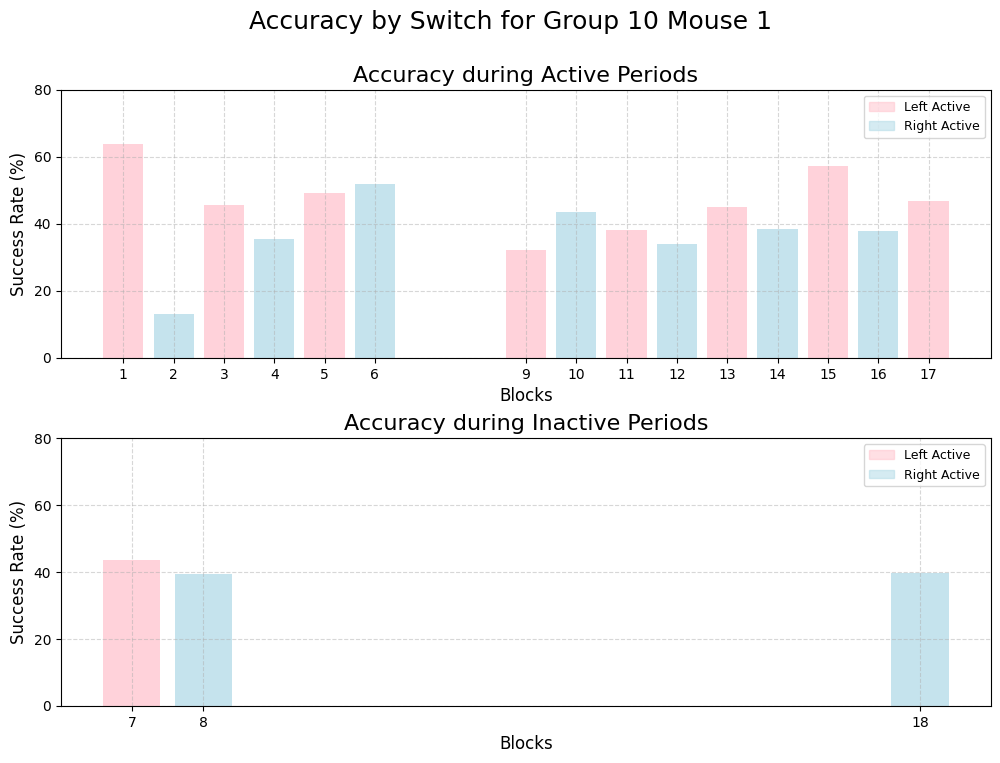

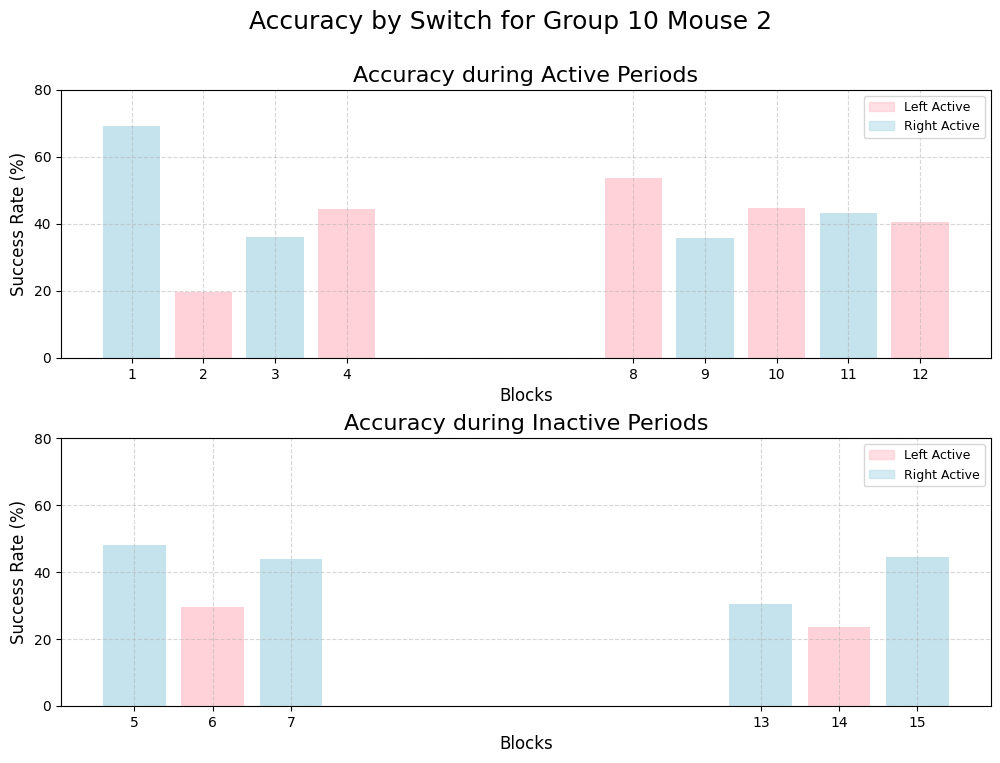

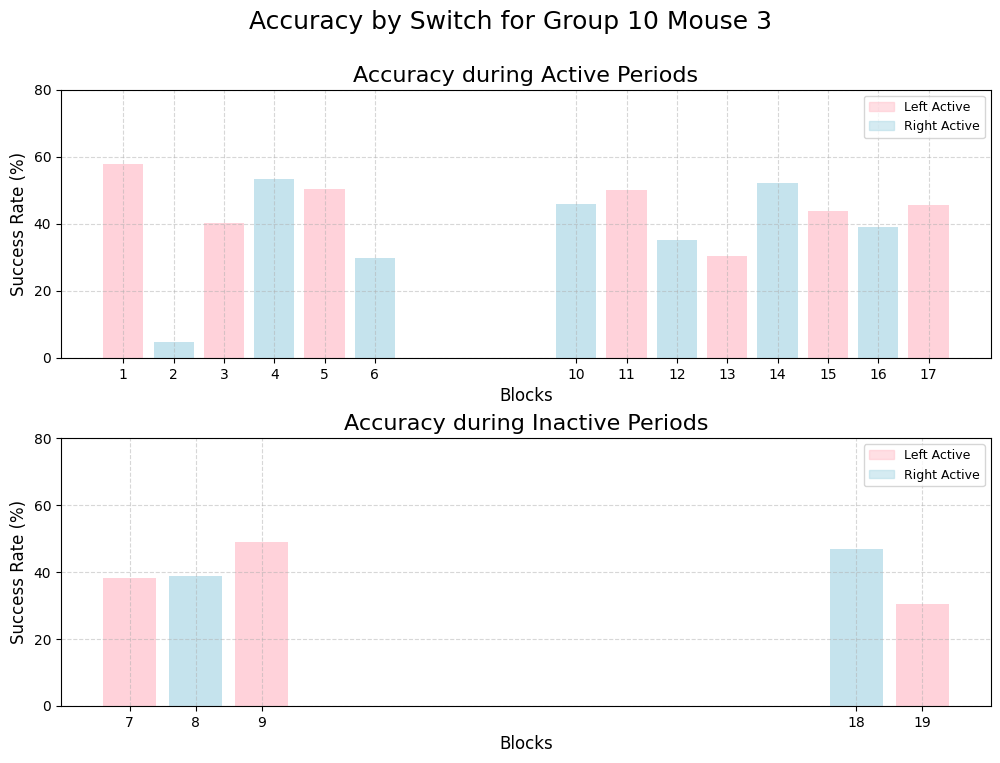

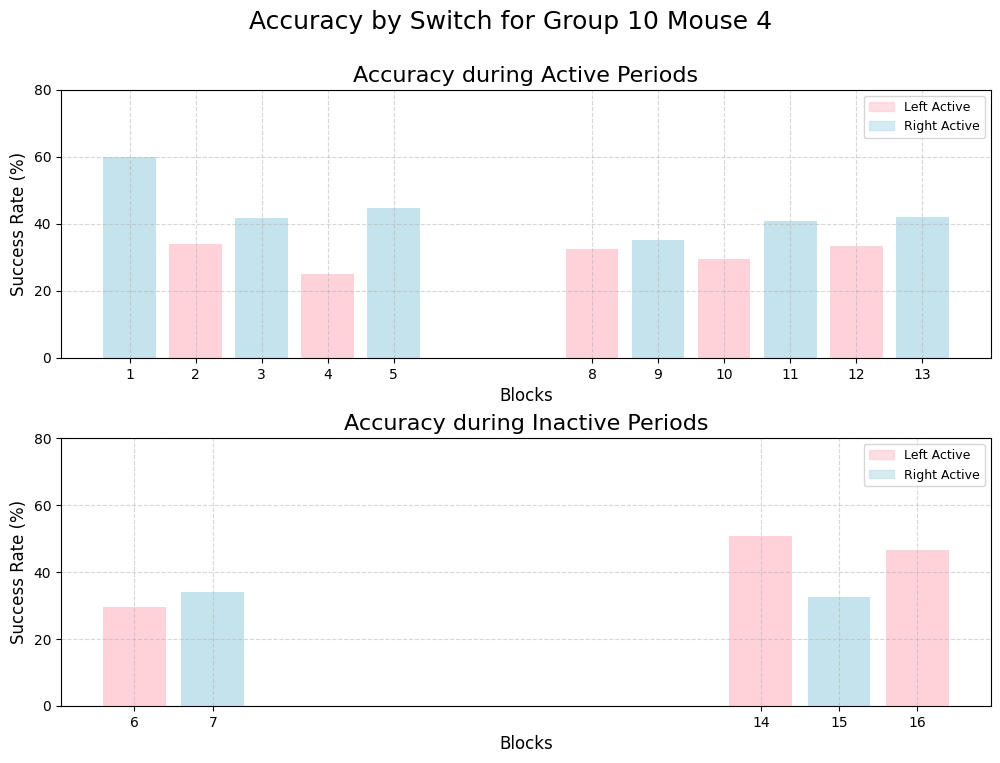

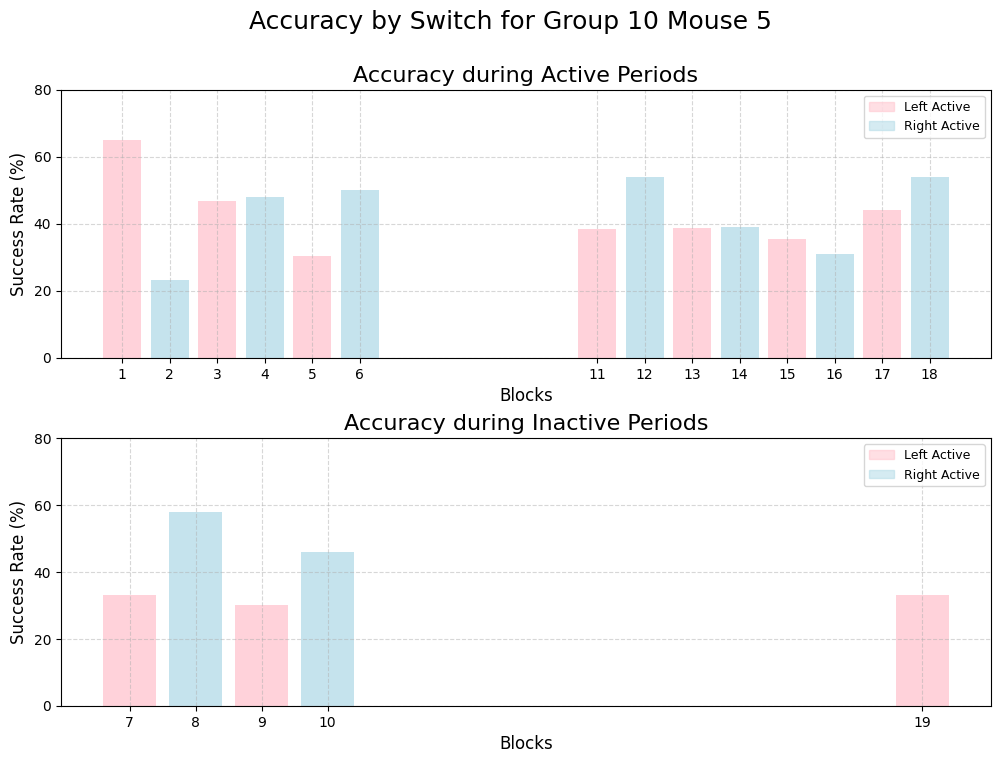

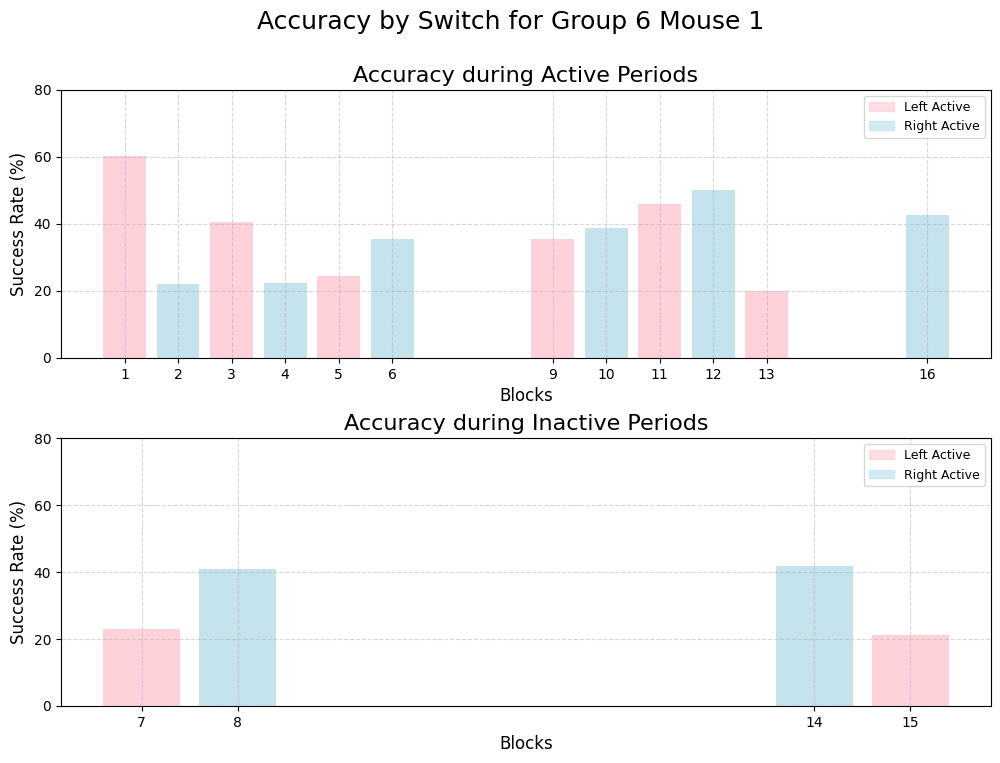

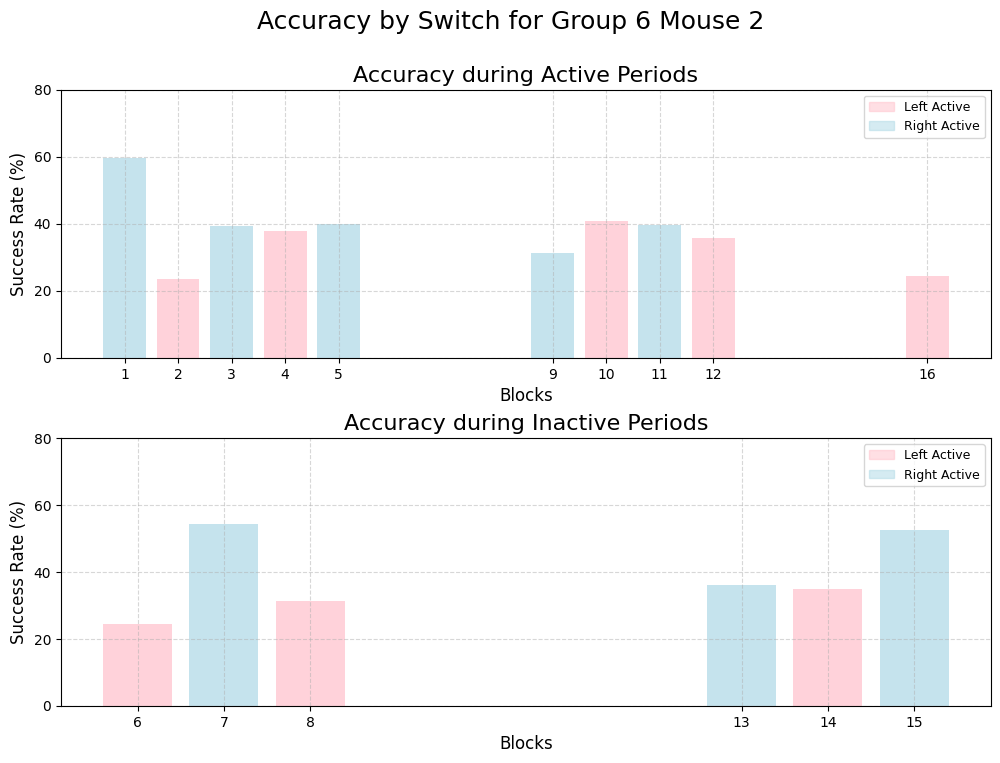

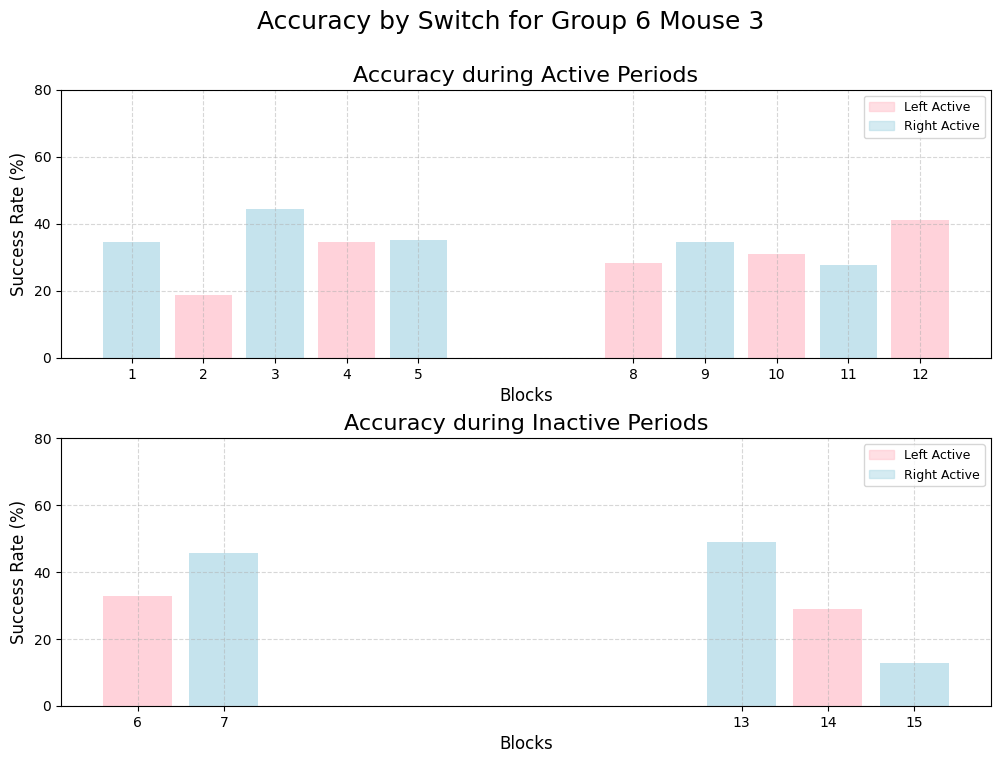

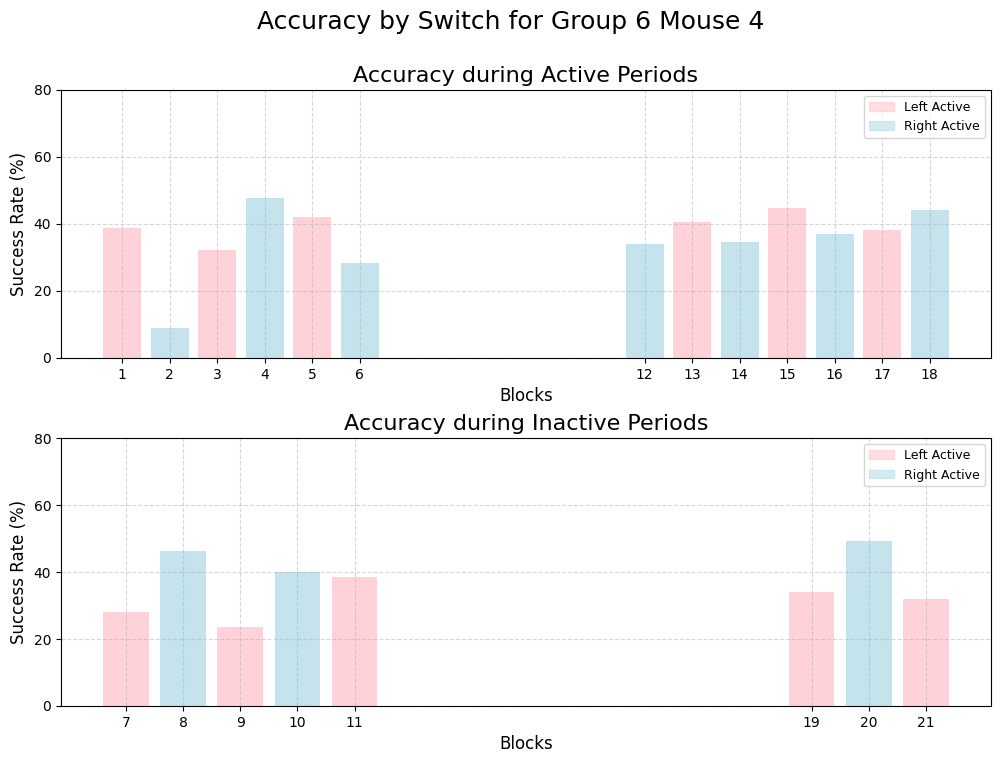

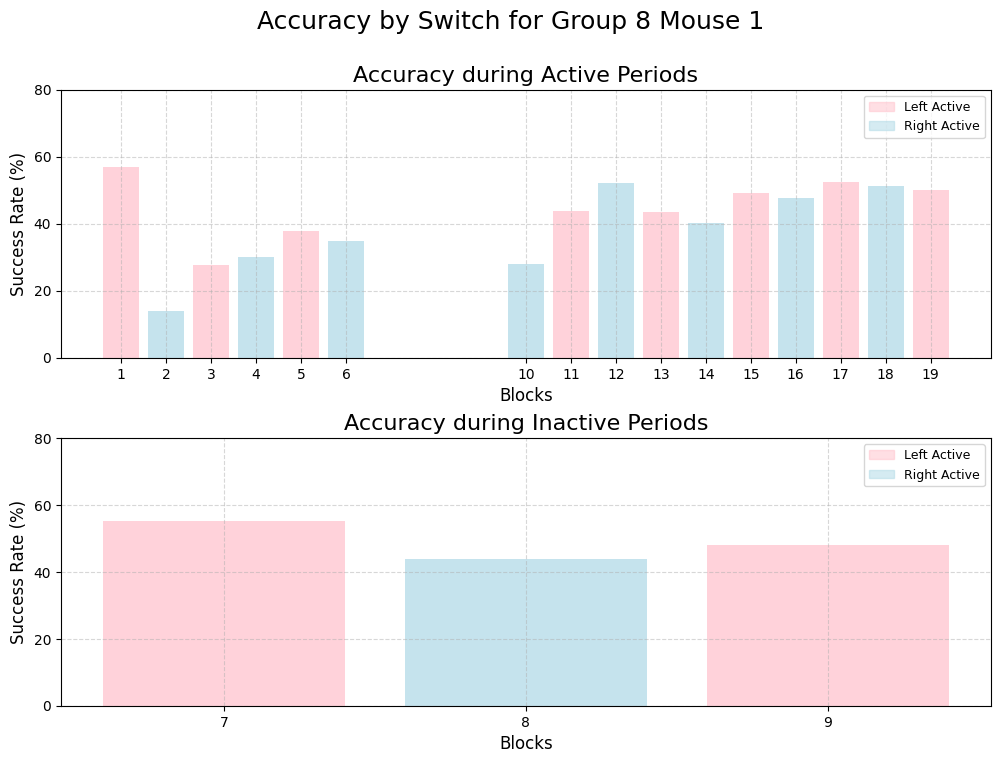

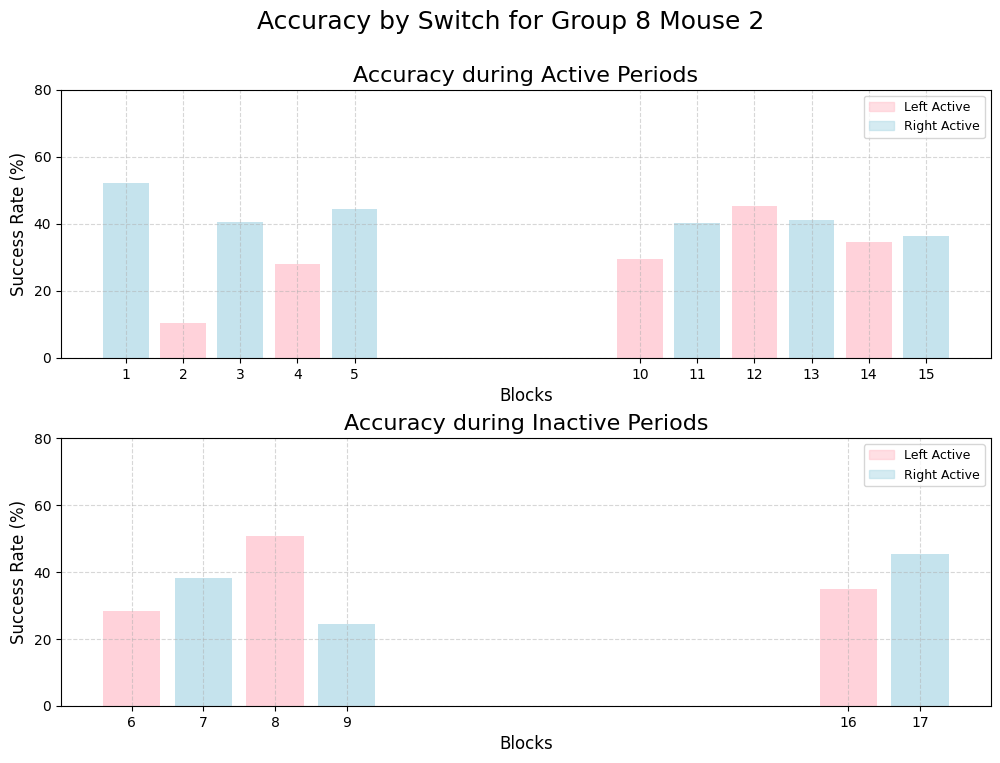

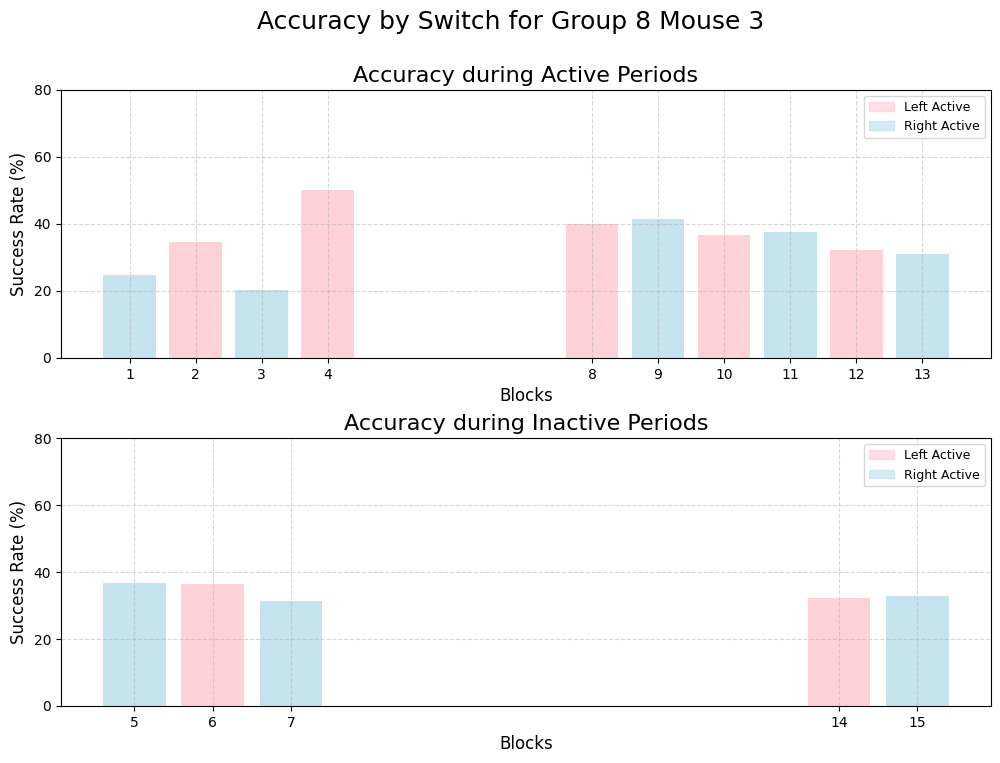

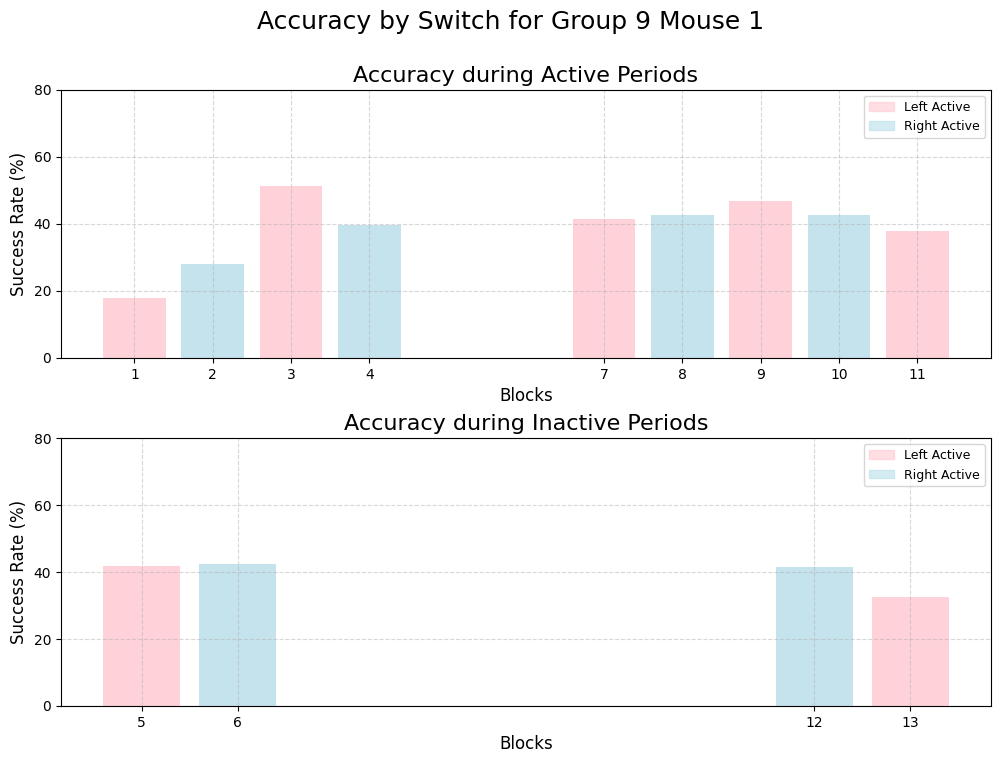

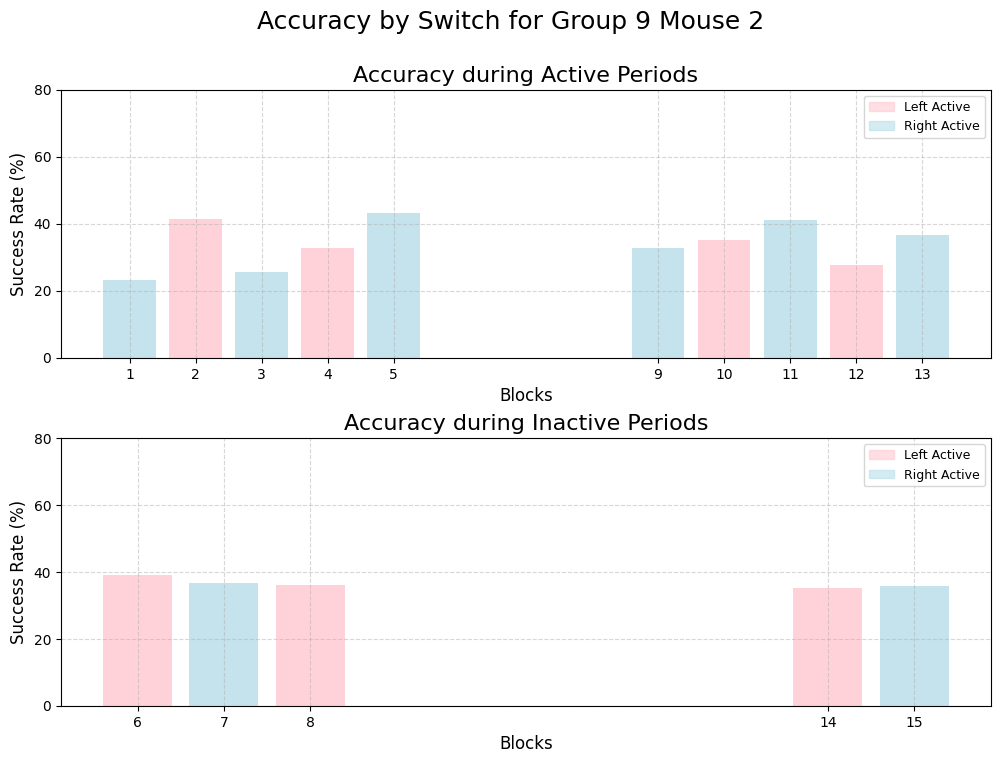

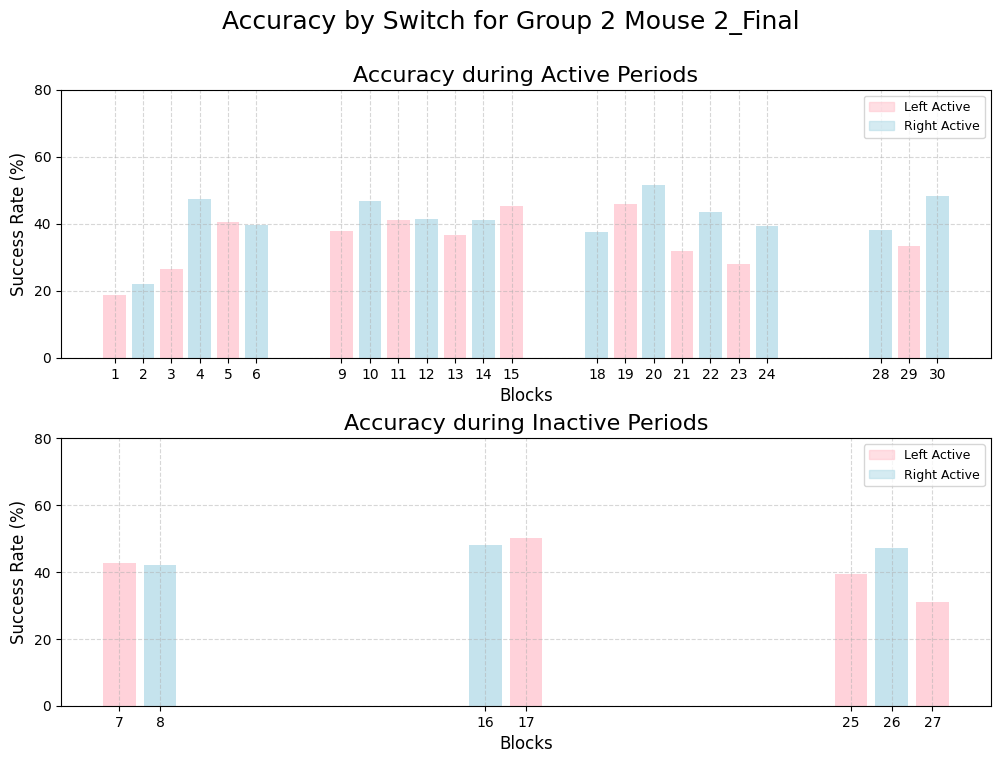

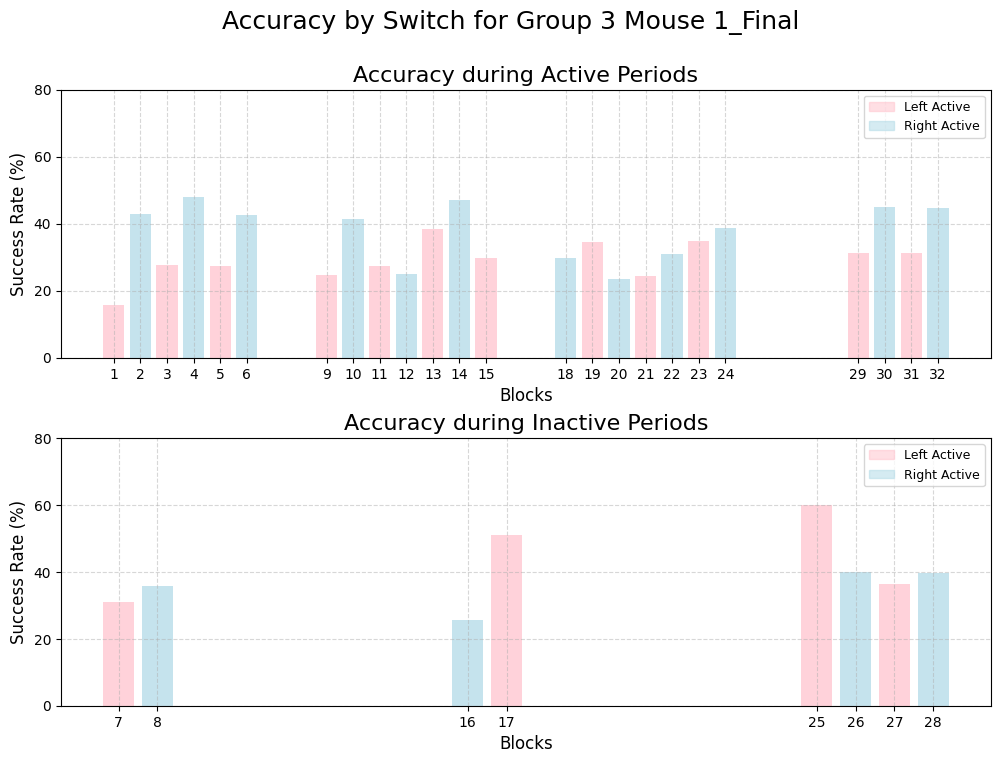

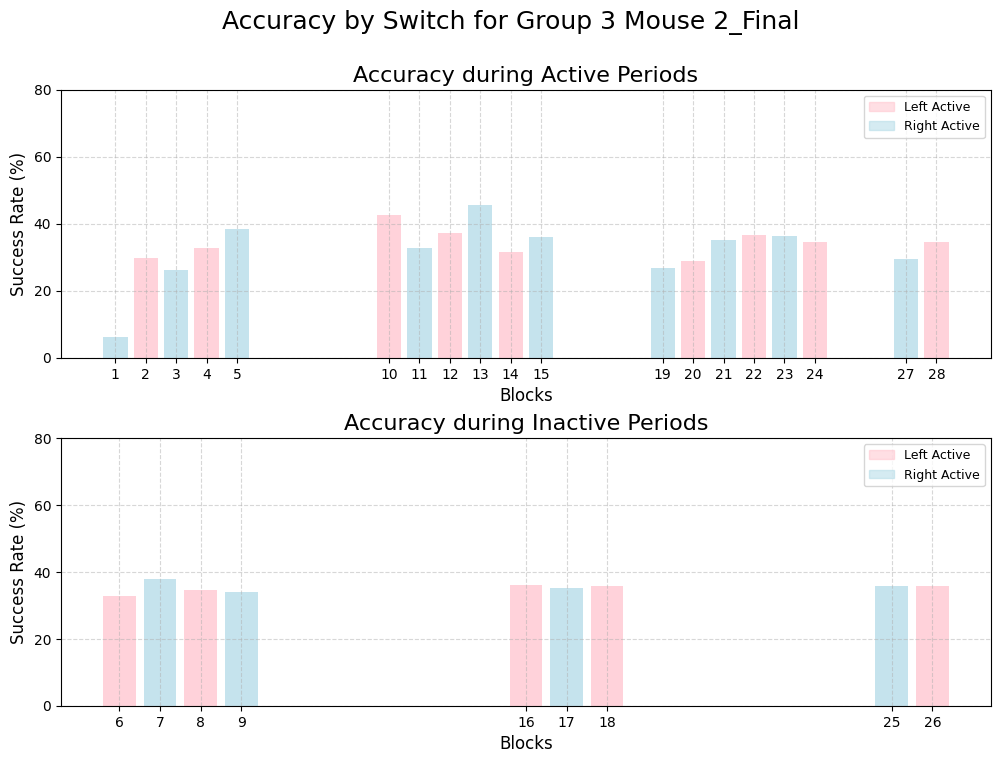

In [3]:
cask_scores = []

for path in paths.contigency_flip_cask:
    data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    dit.graph_learning_trend_by_activity(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
import intervals as invs

invs.perform_T_test(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.021527976620255934
Experiment group is significantly greater than control group


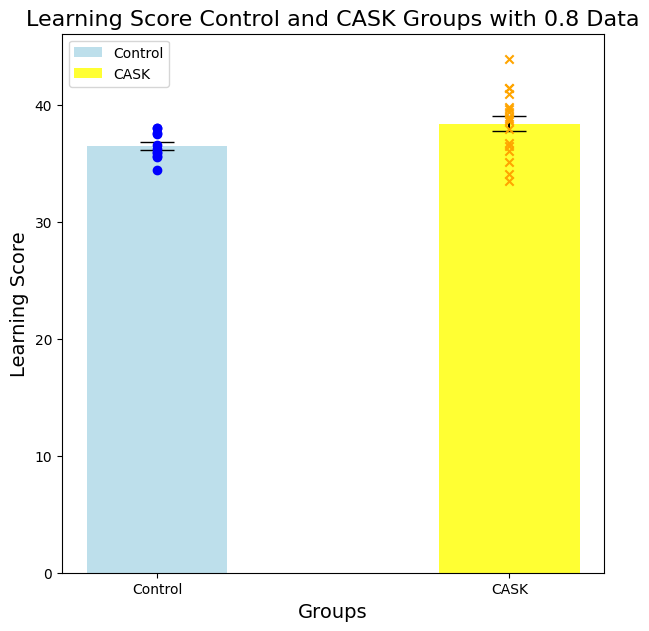

In [5]:
dit.graph_learning_score(ctrl_scores, cask_scores, exp_group_name='CASK', proportion=action_prop)

### Pellet Collect Time

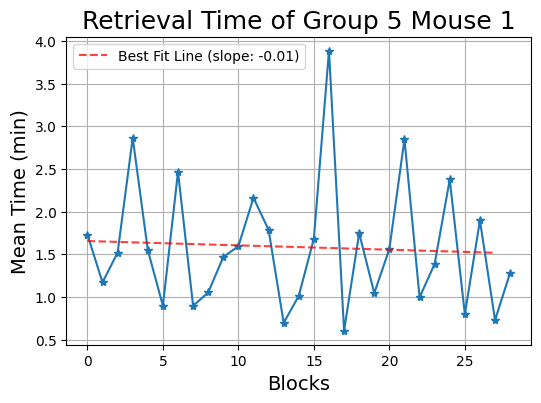

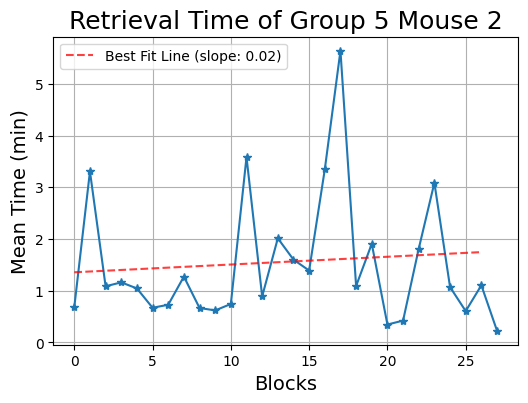

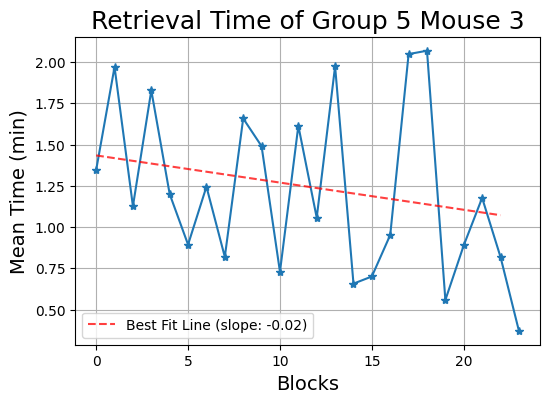

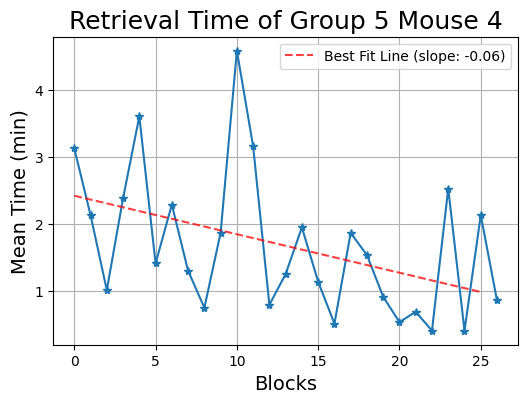

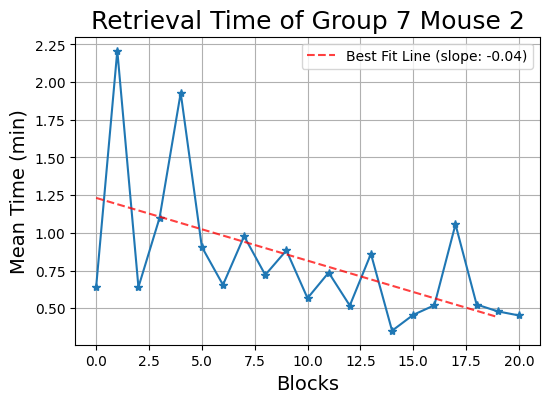

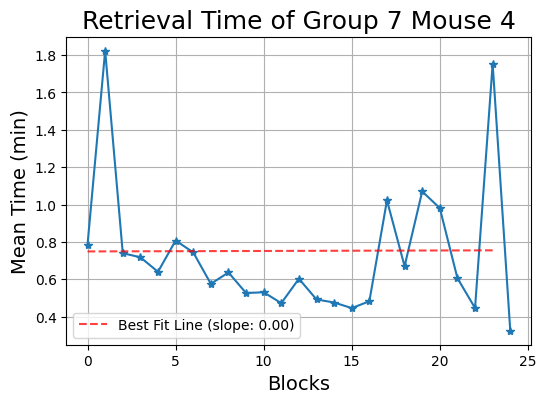

../scripts/preprocessing.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


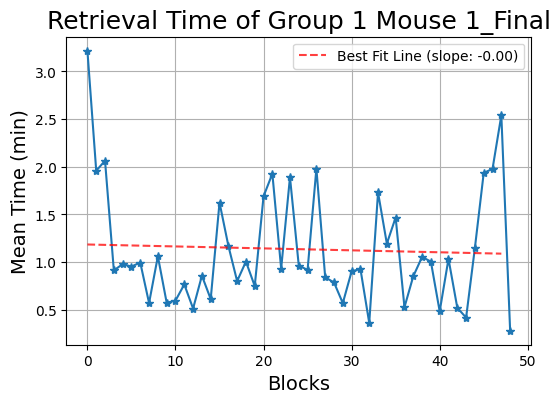

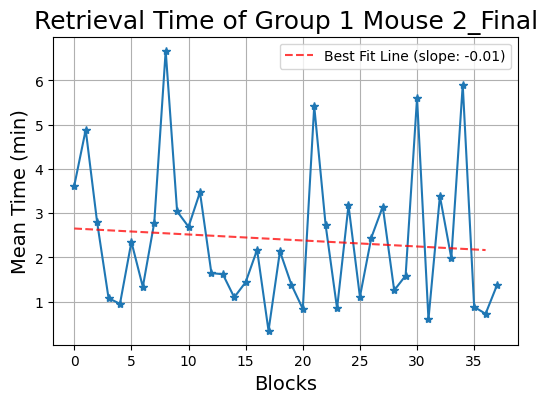

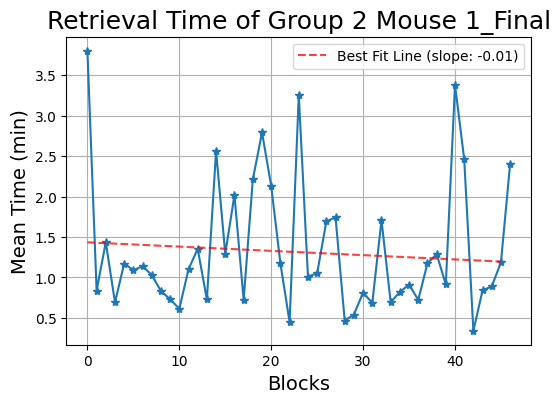

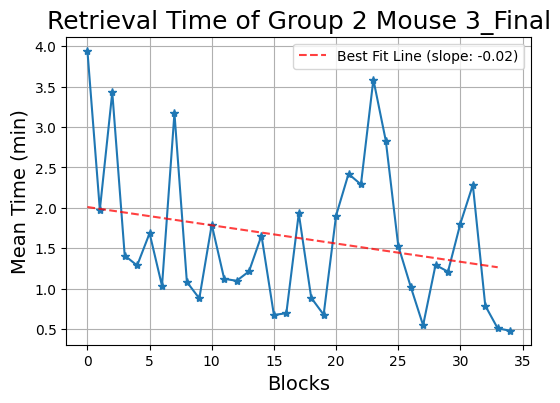

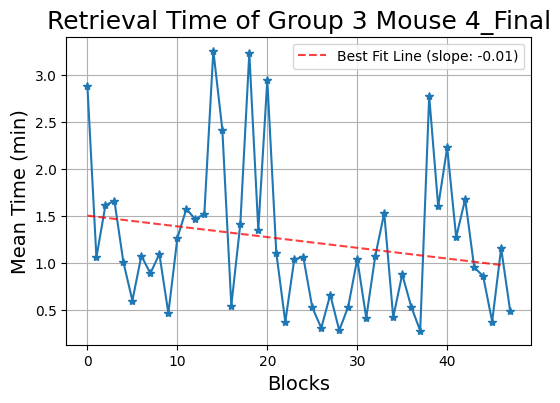

In [6]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []
ctrl_slope = []

for file in paths.contigency_flip_ctrl[:]:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    _, slope = plot_retrieval_time_by_block(file)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)
    ctrl_slope.append(slope)

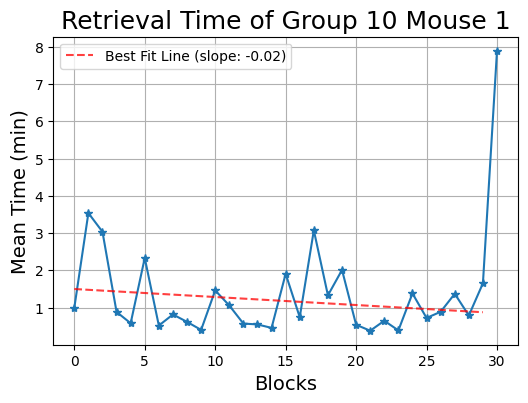

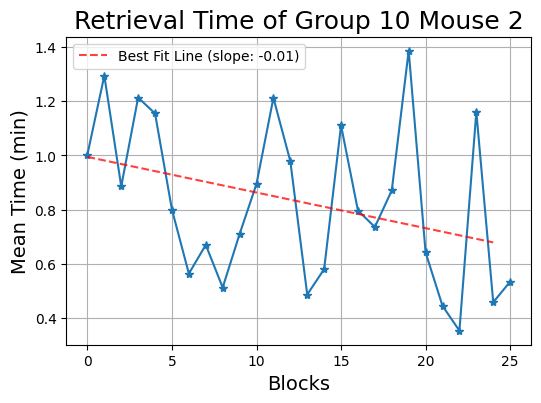

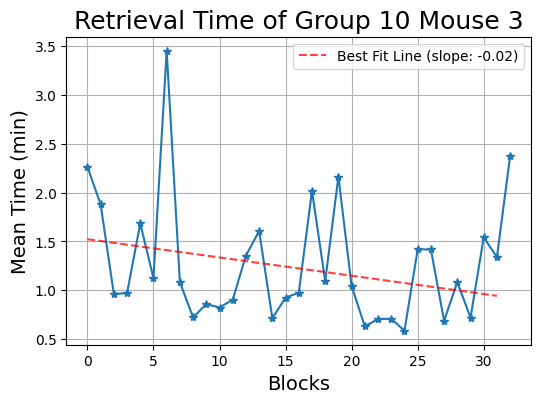

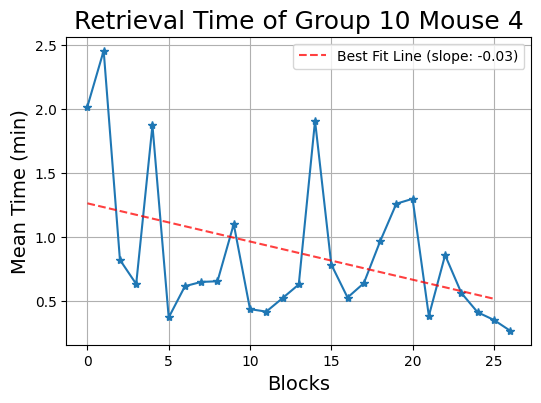

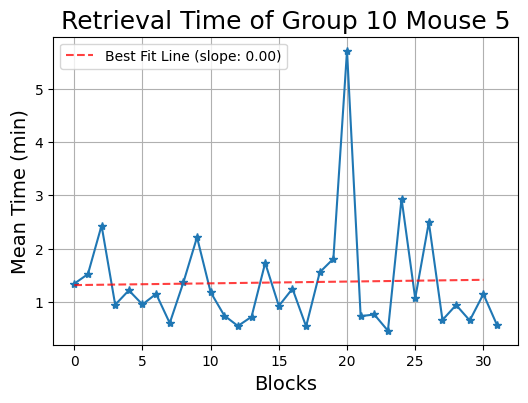

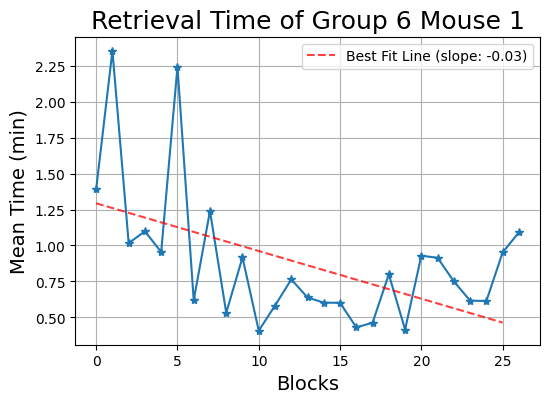

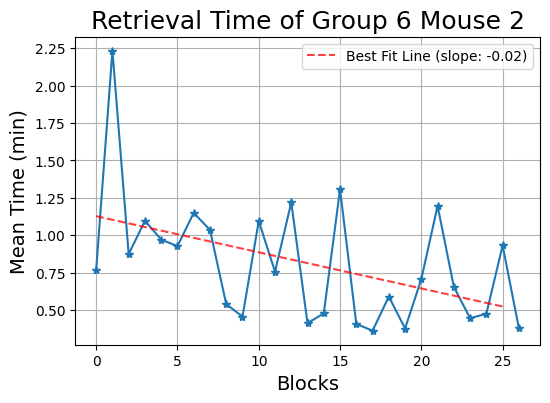

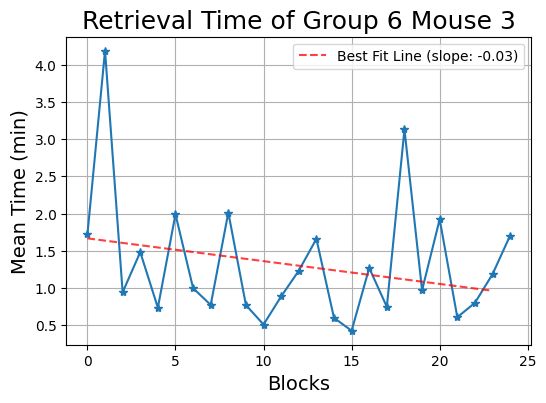

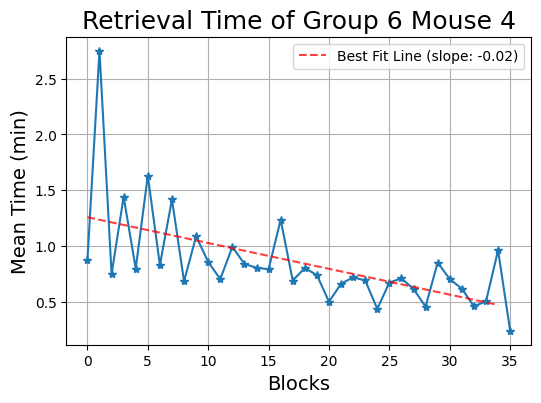

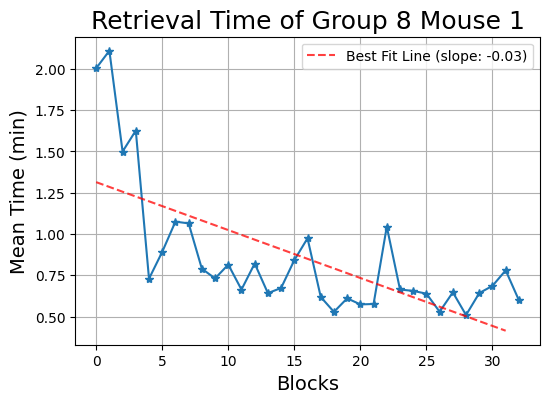

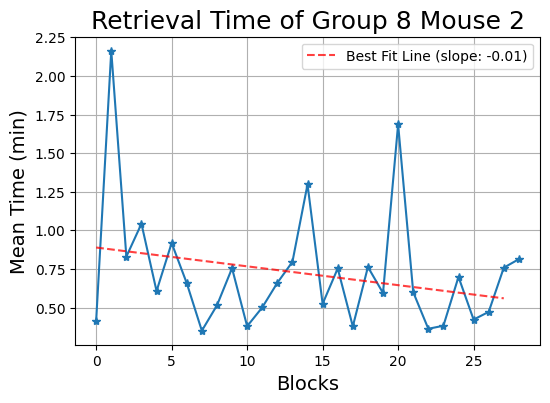

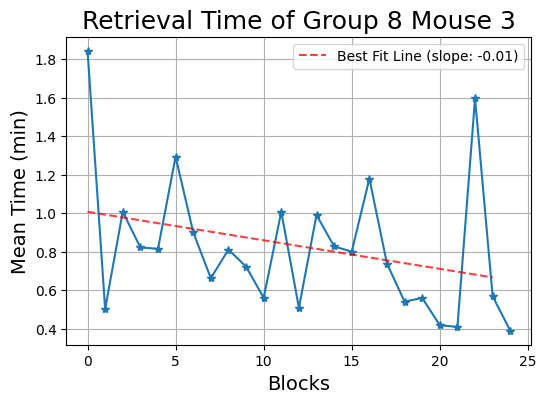

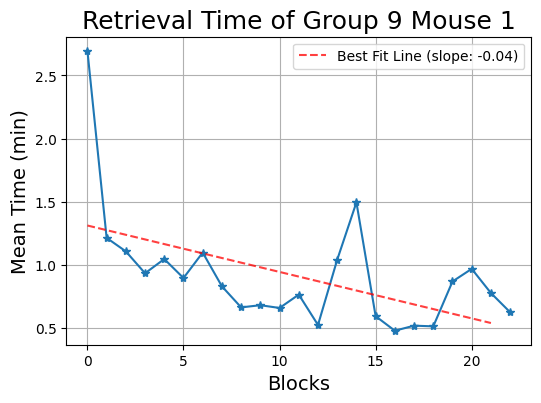

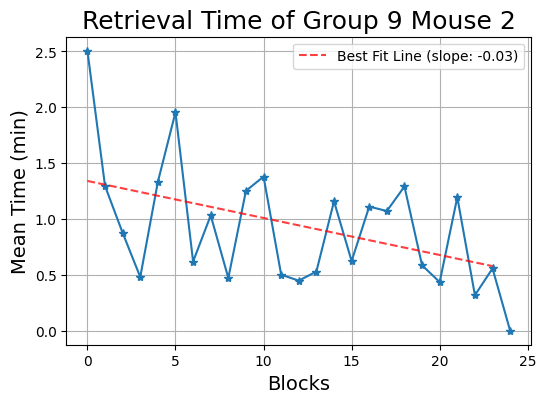

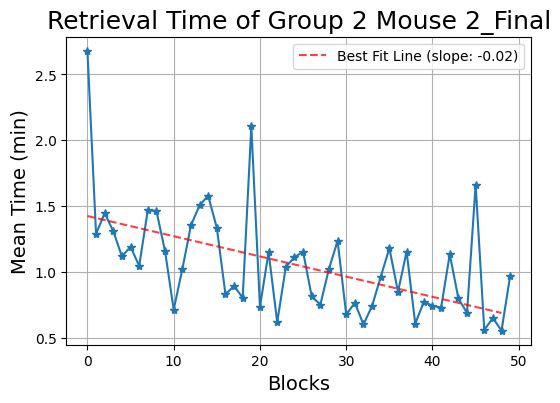

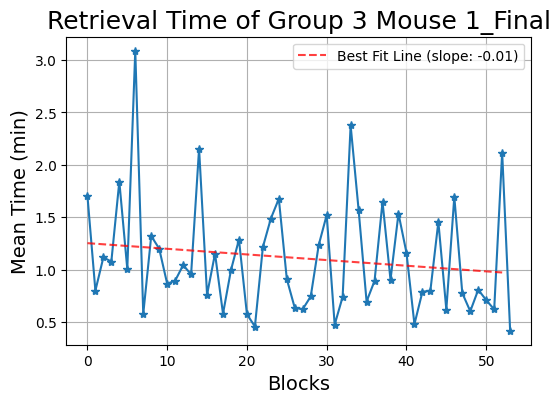

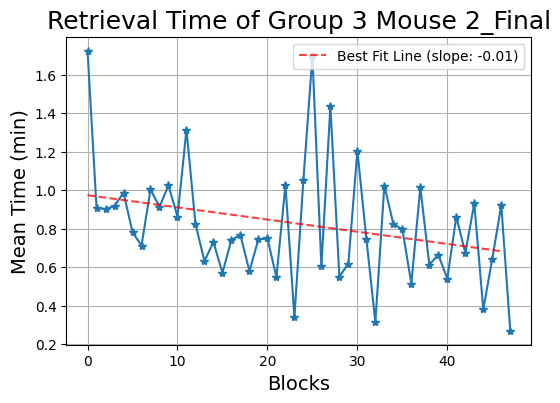

In [7]:
cask_all_times = []
cask_means = []
cask_stds = []
cask_slope = []

for file in paths.contigency_flip_cask:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    _, slope = plot_retrieval_time_by_block(file)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)
    cask_slope.append(slope)

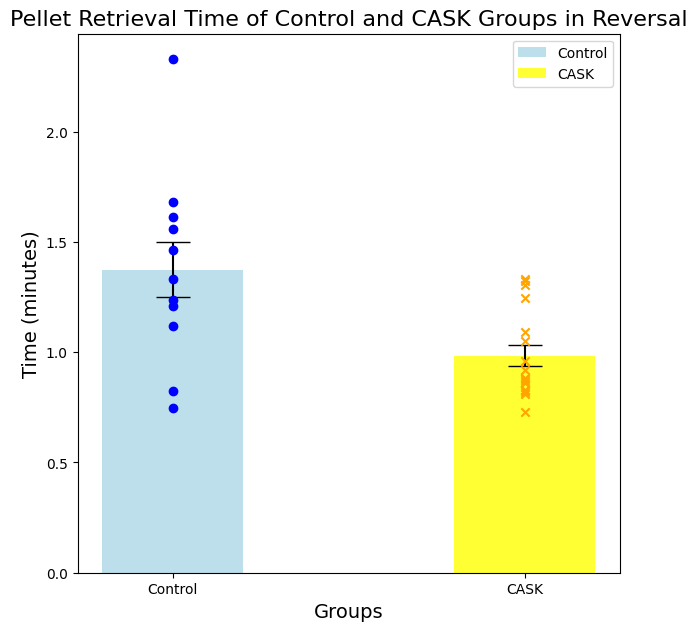

In [8]:
dit.graph_retrieval_time(ctrl_means, cask_means, exp_group_name='CASK', rev=True)

In [9]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='less')

P Value is  0.0017634573106342514
Experiment group is significantly less than control group


In [10]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.0013515970863385725
Experiment group is significantly less than control group


In [11]:
invs.perform_T_test(ctrl_slope, cask_slope, test_side='less')

P Value is  0.18623202171886016
There is no significant difference between the two groups.


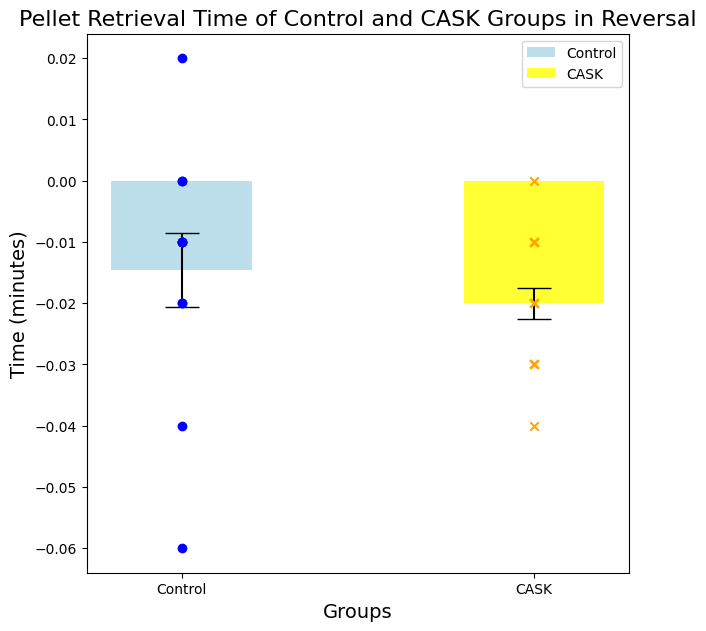

In [12]:
dit.graph_retrieval_time(ctrl_slope, cask_slope, exp_group_name='CASK', rev=True)

In [13]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []

for file in paths.fr1_ctrl_csvs:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)

In [14]:
cask_all_times = []
cask_means = []
cask_stds = []

for file in paths.fr1_cask_csvs:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)

In [15]:
ctrl_means.remove(max(ctrl_means))
cask_means.remove(max(cask_means))

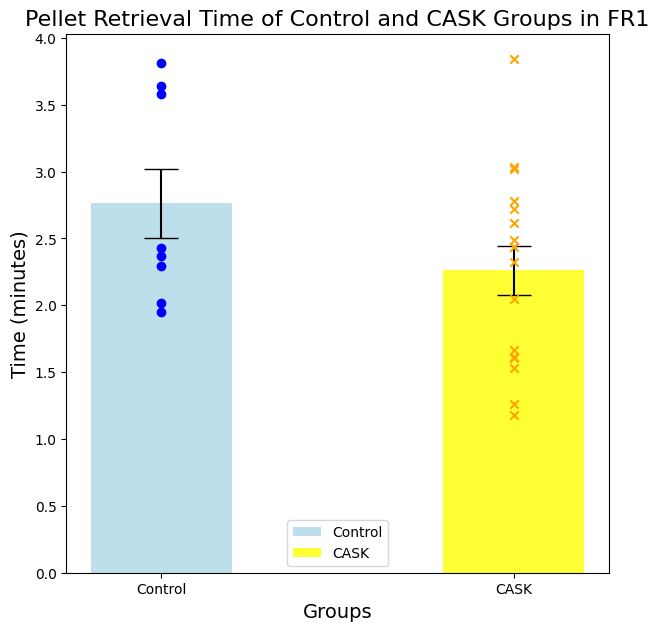

In [16]:
dit.graph_retrieval_time(ctrl_means, cask_means, exp_group_name='CASK', rev=False)

In [17]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='less')

P Value is  0.0693880525809646
There is no significant difference between the two groups.


In [18]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.1128791630241217
There is no significant difference between the two groups.
